In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('C:\Datasetsml\city_day.csv')

In [3]:
# Display the dataset structure and first few rows
df.head()
#data.info()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Check for missing values
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [15]:
# Convert 'Date' column to datetime format for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

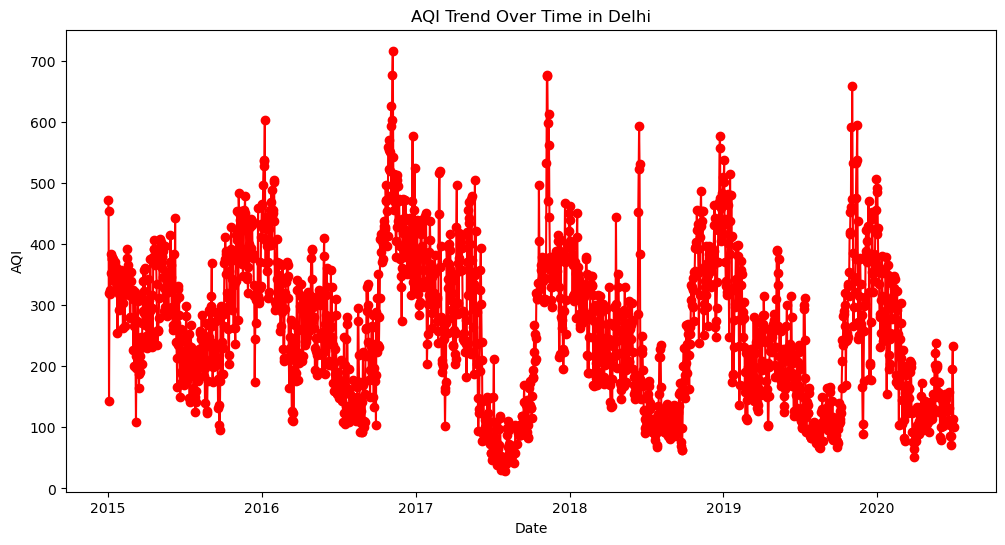

In [16]:
# 4. Plot the overall AQI trend over time for a specific city (e.g., Delhi)
city_data = df[df['City'] == 'Delhi']
plt.figure(figsize=(12, 6))
plt.plot(city_data['Date'], city_data['AQI'], 'ro-')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time in Delhi')

plt.show()

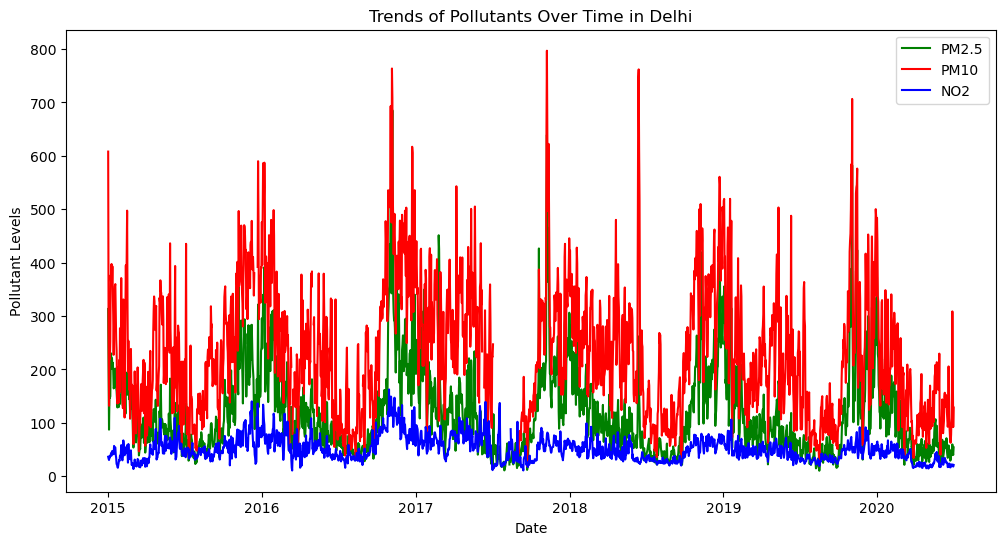

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(city_data['Date'], city_data['PM2.5'], label='PM2.5', color='g')
plt.plot(city_data['Date'], city_data['PM10'], label='PM10', color='r')
plt.plot(city_data['Date'], city_data['NO2'], label='NO2', color='b')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.title('Trends of Pollutants Over Time in Delhi')
plt.legend()

plt.show()

In [18]:
# 6. Bar plot for comparing average AQI per year in Delhi
city_data['Year'] = city_data['Date'].dt.year
avg_aqi_per_year = city_data.groupby('Year')['AQI'].mean().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_15040\1369950249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data['Date'].dt.year


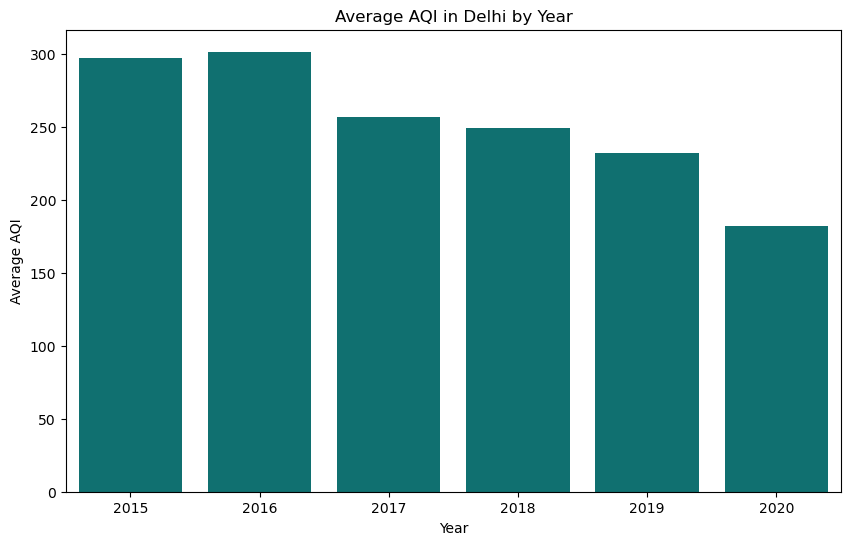

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='AQI', data=avg_aqi_per_year, color='teal')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI in Delhi by Year')

plt.show()

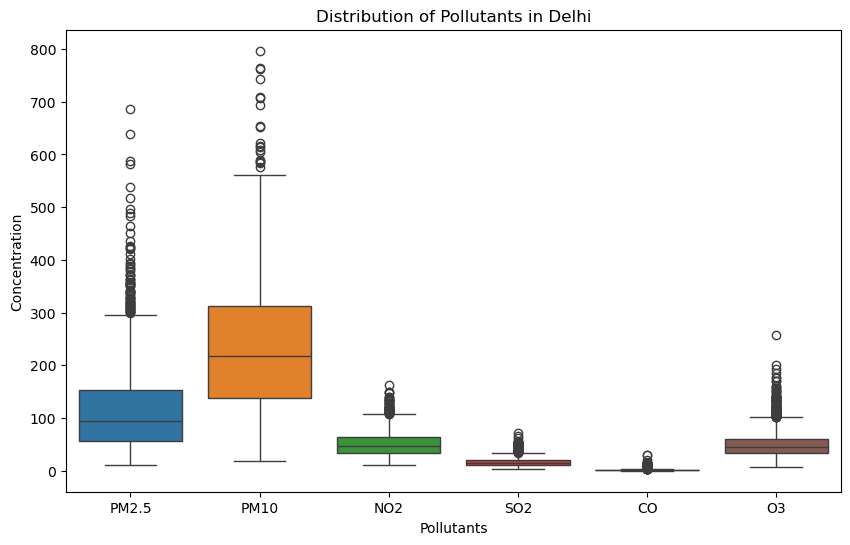

In [20]:
# 7. Box plot to analyze the distribution of pollutant levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=city_data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.title('Distribution of Pollutants in Delhi')
plt.xlabel('Pollutants')
plt.ylabel('Concentration')
plt.show()


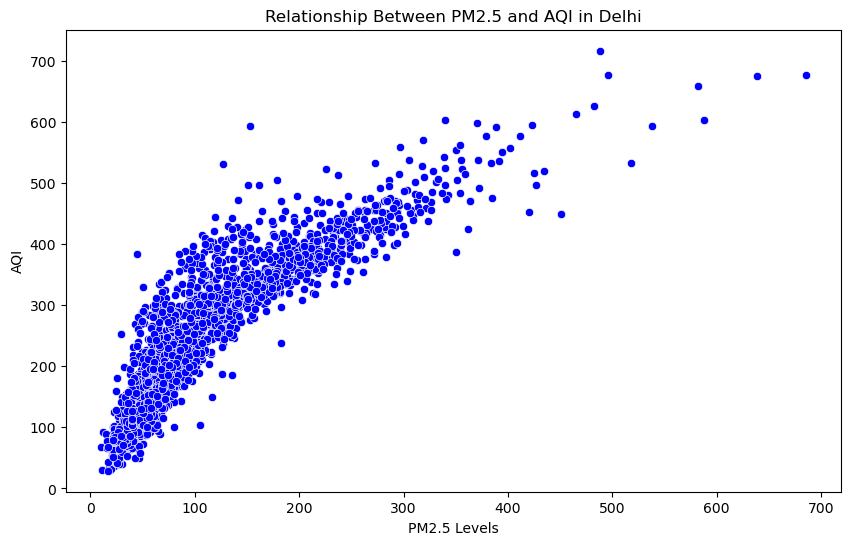

In [23]:

# 8. Scatter plot to explore the relationship between PM2.5 and AQI in Delhi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=city_data, color='blue')
plt.xlabel('PM2.5 Levels')
plt.ylabel('AQI')
plt.title('Relationship Between PM2.5 and AQI in Delhi')
plt.show()